# Airbnb Prices in European Cities analysis
This is a data analysis on the Airbnb prices in 10 European cities. This analysis focuses on data visualization as it is
part of my Codecademy Data Scientist course on the topic of data visualization. 

## Scope of the Project
This project will initially be divided in the following parts:

1. Initial data inspection
2. Price comparison between cities in dataset
3. Influence of spatial factors on price
4. Multiple Regression Model to find strongest determinants of price and to make predictions



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
#pallete that will be used throughout analysis in graphs
palette = ['#FC814A', '#816581', '#96939B', '#BFBFBF', '#E8E8E8']
diverging23 = sns.diverging_palette(h_neg=300, h_pos=19, s=97, l=64, sep=1,
                                 n=23, center='light')
diverging9 = sns.diverging_palette(h_neg=300, h_pos=19, s=97, l=64, sep=1,
                                 n=9, center='light')

Import all the different datasets and combine them.

In [4]:
amsterdam_weekdays = pd.read_csv('amsterdam_weekdays.csv')
amsterdam_weekends = pd.read_csv('amsterdam_weekends.csv')
athens_weekdays = pd.read_csv('athens_weekdays.csv')
athens_weekends = pd.read_csv('athens_weekends.csv')
barcelona_weekdays = pd.read_csv('barcelona_weekdays.csv')
barcelona_weekends = pd.read_csv('barcelona_weekends.csv')
berlin_weekdays = pd.read_csv('berlin_weekdays.csv')
berlin_weekends = pd.read_csv('berlin_weekends.csv')
budapest_weekdays = pd.read_csv('budapest_weekdays.csv')
budapest_weekends = pd.read_csv('budapest_weekends.csv')
lisbon_weekdays = pd.read_csv('lisbon_weekdays.csv')
lisbon_weekends = pd.read_csv('lisbon_weekends.csv')
london_weekdays = pd.read_csv('london_weekdays.csv')
london_weekends = pd.read_csv('london_weekends.csv')
paris_weekdays = pd.read_csv('paris_weekdays.csv')
paris_weekends = pd.read_csv('paris_weekends.csv')
rome_weekdays = pd.read_csv('rome_weekdays.csv')
rome_weekends = pd.read_csv('rome_weekends.csv')
vienna_weekdays = pd.read_csv('vienna_weekdays.csv')
vienna_weekends = pd.read_csv('vienna_weekends.csv')


In [5]:
def combine(csv_1, col_1, csv_2, col_2, city):
    csv_1['week_time'] = col_1
    csv_2['week_time'] = col_2
    merged = pd.concat([csv_1, csv_2])
    merged['city'] = city
    return merged

In [6]:
amsterdam = combine(amsterdam_weekdays,'weekdays',amsterdam_weekends,'weekends','amsterdam')
athens = combine(athens_weekdays,'weekdays',athens_weekends,'weekends','athens')
barcelona = combine(barcelona_weekdays,'weekdays',barcelona_weekends,'weekends','barcelona')
berlin = combine(berlin_weekdays,'weekdays',berlin_weekends,'weekends','berlin')
budapest = combine(budapest_weekdays,'weekdays',budapest_weekends,'weekends','budapest')
lisbon = combine(lisbon_weekdays,'weekdays',lisbon_weekends,'weekends','lisbon')
london = combine(london_weekdays,'weekdays',london_weekends,'weekends','london')
paris = combine(paris_weekdays,'weekdays',paris_weekends,'weekends','paris')
rome = combine(rome_weekdays,'weekdays',rome_weekends,'weekends','rome')
vienna = combine(vienna_weekdays,'weekdays',vienna_weekends,'weekends','vienna')

In [7]:
cities = [amsterdam, athens, barcelona, berlin, budapest, lisbon, london, paris, rome, vienna]
city_names = [city.city.unique()[0].capitalize() for city in cities]
europe_data = pd.concat(cities, ignore_index=True)
europe_data.drop(columns = ['Unnamed: 0'], inplace=True)

### 1 Initial Data Inspection


In [8]:
europe_data.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,week_time,city
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,weekdays,amsterdam
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,weekdays,amsterdam
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,weekdays,amsterdam
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,weekdays,amsterdam
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,weekdays,amsterdam


In [9]:
europe_data.sample(5)

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,week_time,city
20808,211.772983,Private room,False,True,2.0,False,0,1,10.0,100.0,...,0.138031,0.195217,526.091285,17.352210,1304.893736,73.338479,-9.14100,38.71300,weekends,lisbon
32808,530.571349,Entire home/apt,False,False,3.0,False,1,0,10.0,100.0,...,0.917177,0.141551,759.095290,36.952503,1386.999338,81.499439,2.34220,48.86100,weekdays,paris
21831,447.936210,Entire home/apt,False,False,4.0,True,1,0,10.0,99.0,...,1.909051,0.265601,128.684430,4.244433,393.657920,22.124616,-9.14598,38.72884,weekends,lisbon
24948,212.610833,Entire home/apt,False,False,2.0,False,0,1,8.0,80.0,...,6.030002,0.333184,207.138036,14.398395,478.055496,8.559983,-0.20800,51.48800,weekdays,london
5577,284.020341,Private room,False,True,2.0,False,0,1,10.0,100.0,...,1.938073,0.281410,118.281387,4.456575,196.916856,2.940744,23.71406,37.97999,weekends,athens


Looking at europe_data.head() and europe_data.sample(5) we can see the following features:

In [10]:
europe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  float64
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  float64
 9   guest_satisfaction_overall  51707 non-null  float64
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  517

attr_index, atrr_index_norm, rest_index and rest_index_norm are not specified in any documentation accompanying the data set. It remains a bit unclear what these features mean, so we will not use in the analysis. 

Further, we can see that there are no non-null counts in the dataset and we have int64, float64, object and boolean datatypes in the dataset.

In [11]:
europe_data.describe(include='all')

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,week_time,city
count,51707.000000,51707,51707,51707,51707.000000,51707,51707.000000,51707.000000,51707.000000,51707.000000,...,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707,51707
unique,NaN,3,2,2,NaN,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,10
top,NaN,Entire home/apt,False,False,NaN,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekends,london
freq,NaN,32648,51341,33014,NaN,38475,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26207,9993
mean,279.879591,NaN,NaN,NaN,3.161661,NaN,0.291353,0.350204,9.390624,92.628232,...,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128,NaN,NaN
std,327.948386,NaN,NaN,NaN,1.298545,NaN,0.454390,0.477038,0.954868,8.945531,...,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263,NaN,NaN
min,34.779339,NaN,NaN,NaN,2.000000,NaN,0.000000,0.000000,2.000000,20.000000,...,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000,NaN,NaN
25%,148.752174,NaN,NaN,NaN,2.000000,NaN,0.000000,0.000000,9.000000,90.000000,...,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510,NaN,NaN
50%,211.343089,NaN,NaN,NaN,3.000000,NaN,0.000000,0.000000,10.000000,95.000000,...,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690,NaN,NaN
75%,319.694287,NaN,NaN,NaN,4.000000,NaN,1.000000,1.000000,10.000000,99.000000,...,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885,NaN,NaN


The dataset consists of 51707 entries and looking at the max values of for example, realSum and distance, we need to be wary of some outliers.

The weekend and weekdays are distributed pretty evenly with a frequency of 26207 'weekends' listings, wich is slightly more than 50% of 51707. The city with the most listings in this dataset is London with 9993 data entries, wchich is almost 20% of the dataset. Looking at the value counts below we can see that not every city is represented equally in the dataset. But with 2080 data entries for the city (amsterdam) with the least data entries, we have plenty data to be sure this is a realistic representation.

In [12]:
listing_counts = europe_data.groupby('city').realSum.count().reset_index()
superhost_count = europe_data.groupby('city').host_is_superhost.sum().reset_index()
superhost_count['abbr'] = superhost_count.city.apply(lambda x: x[:3].upper())

listing_superhost_count = pd.merge(listing_counts, superhost_count).sort_values('realSum', ascending=False)
listing_superhost_count['perc'] = listing_superhost_count.apply(lambda row:
                                                                round((row['host_is_superhost'] / row['realSum'] * 100), 1), axis=1)
listing_superhost_count['perc'] = listing_superhost_count.perc.apply(lambda x: str(x)+"%")

listing_superhost_count

,city,realSum,host_is_superhost,abbr,perc
6,london,9993,1573,LON,15.7%
8,rome,9027,2949,ROM,32.7%
7,paris,6688,941,PAR,14.1%
5,lisbon,5763,1233,LIS,21.4%
1,athens,5280,2263,ATH,42.9%
4,budapest,4022,1524,BUD,37.9%
9,vienna,3537,1005,VIE,28.4%
2,barcelona,2833,514,BAR,18.1%
3,berlin,2484,639,BER,25.7%
0,amsterdam,2080,591,AMS,28.4%


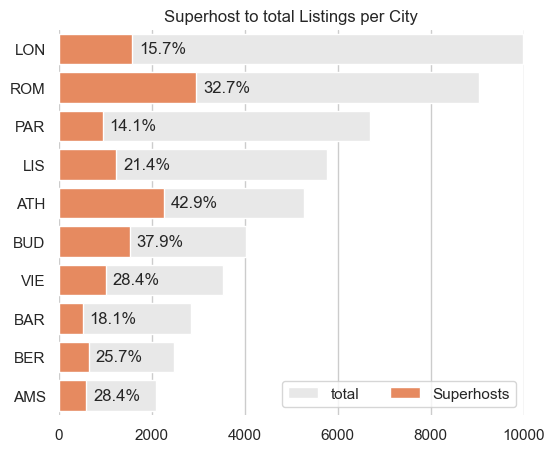

<Figure size 640x480 with 0 Axes>

In [13]:
sns.set_theme(style='whitegrid')

f, ax = plt.subplots(figsize=(6, 5))

sns.set_color_codes('pastel')
sns.barplot(x='realSum', y='abbr', data=listing_superhost_count, label='total', color='#E8E8E8')

sns.set_color_codes('muted')
sns.barplot(x='host_is_superhost', y='abbr', data=listing_superhost_count, label='Superhosts', color='#FC814A')

ax.legend(ncol=2, loc='lower right', frameon=True)
ax.set(xlim=(0,10000), ylabel='', xlabel='')
ax.bar_label(ax.containers[1], labels=listing_superhost_count.perc, label_type='edge', padding=5)
sns.despine(left=True, bottom=True)

plt.title('Superhost to total Listings per City')
plt.show()
plt.clf()

In the barchart above we can see the distributions of listings per city and what percentage is labeled as superhost per city. We can see that cities like London and Rome are far more prevalent in this dataset than cities like Amsterdam or Berlin. Rome and Athens seem to have the highest percentage of superhost, while Paris and London only have around 15% superhosts. 

According to airbnb a superhost is 'The top-rated, most experienced hosts on Airbnb, committed to providing you with outstanding hospitality', to become one you'll have to meet a range of certain criteria on Airbnb.


To gain an intuitive understanding of other categorical data like room_type, room_shared, host_is_superhost, etc. we will use pie charts.

In [14]:
def cat_satisfaction(satisfaction):
        if satisfaction > 95:
            return '95-100'
        elif satisfaction > 90:
            return '90-95'
        elif satisfaction > 80:
            return '80-90'
        elif satisfaction > 60:
            return '60-80'
        else:
            return 'less than 60'
        
def cat_cleanliness(rating):
    if rating > 9:
        return '10'
    elif rating > 8:
        return '9'
    elif rating > 7:
        return '8'
    elif rating > 5:
        return '6-8'
    else:
        return 'less than 6'

In [15]:
europe_data['bedrooms_cat'] = europe_data.apply(lambda row: '3+' if row['bedrooms'] >= 3 else row['bedrooms'], axis=1)
europe_data['cat_satisfaction'] = europe_data.guest_satisfaction_overall.apply(cat_satisfaction)
europe_data['cat_cleanliness'] = europe_data.cleanliness_rating.apply(cat_cleanliness)
europe_data['person_capacity'] = europe_data['person_capacity'].astype('int')
europe_data.cat_cleanliness.value_counts()

10             30067
9              15458
8               4352
6-8             1448
less than 6      382
Name: cat_cleanliness, dtype: int64

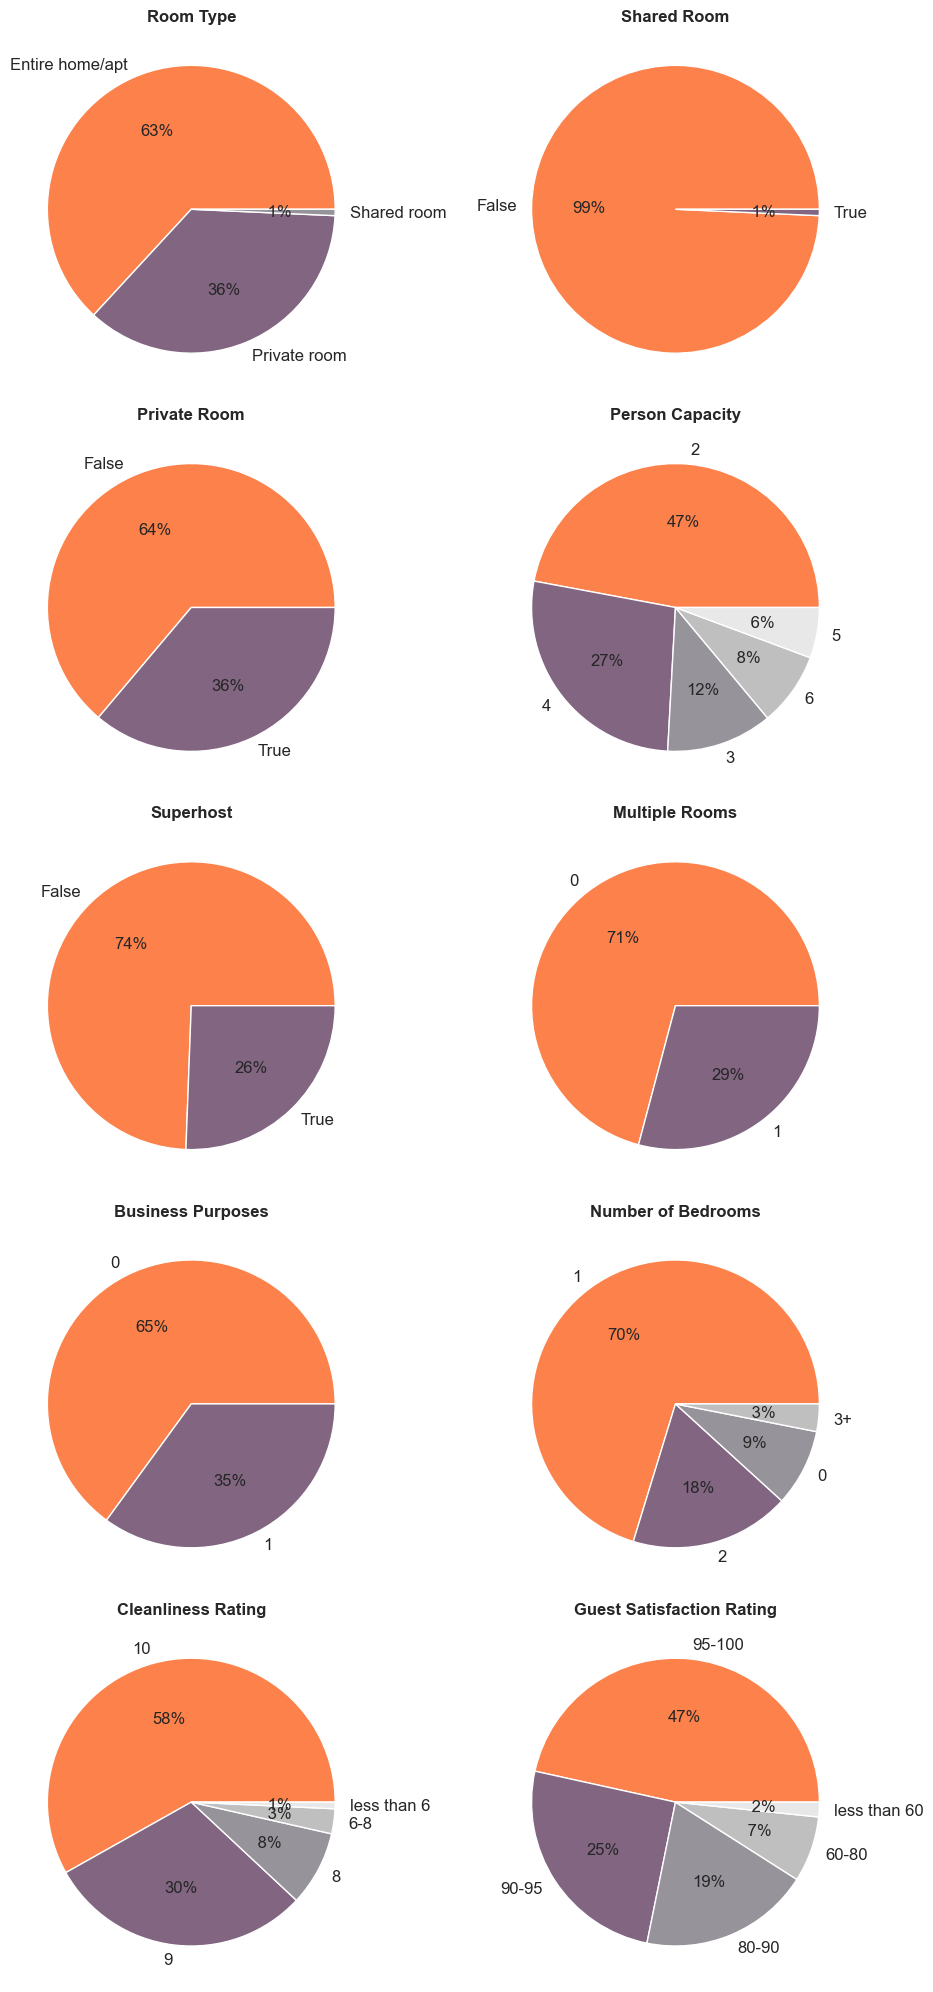

In [16]:
columns = ['room_type', 'room_shared', 'room_private', 'person_capacity',
           'host_is_superhost', 'multi', 'biz', 'bedrooms_cat', 'cat_cleanliness', 'cat_satisfaction']
titles = ['Room Type', 'Shared Room', 'Private Room', 'Person Capacity', 'Superhost', 'Multiple Rooms', 'Business Purposes',
         'Number of Bedrooms', 'Cleanliness Rating', 'Guest Satisfaction Rating']

plt.figure(figsize=(10, 40))

for i, col in enumerate(columns):
    ax = plt.subplot(10, 2, i+1)
    europe_data[col].value_counts().plot.pie(autopct='%2.f%%',textprops={'size':12}, colors=palette)
    plt.title(titles[i], fontsize=12, fontweight='bold')
    plt.ylabel(None)
    
plt.tight_layout()
plt.show()


### 2 Price comparison between cities in dataset

In the function below we combine the weekdays and the weekends of a particular city and also add a new column 'city', since we will be combining all the cities into one big dataset. Also we rank the cities based on average 'realSum' so it is possible to order the boxplot graph.

In [17]:
ranks = europe_data.groupby('city')['realSum'].mean().sort_values()[::-1].index
ranks

Index(['amsterdam', 'paris', 'london', 'barcelona', 'berlin', 'vienna',
       'lisbon', 'rome', 'budapest', 'athens'],
      dtype='object', name='city')

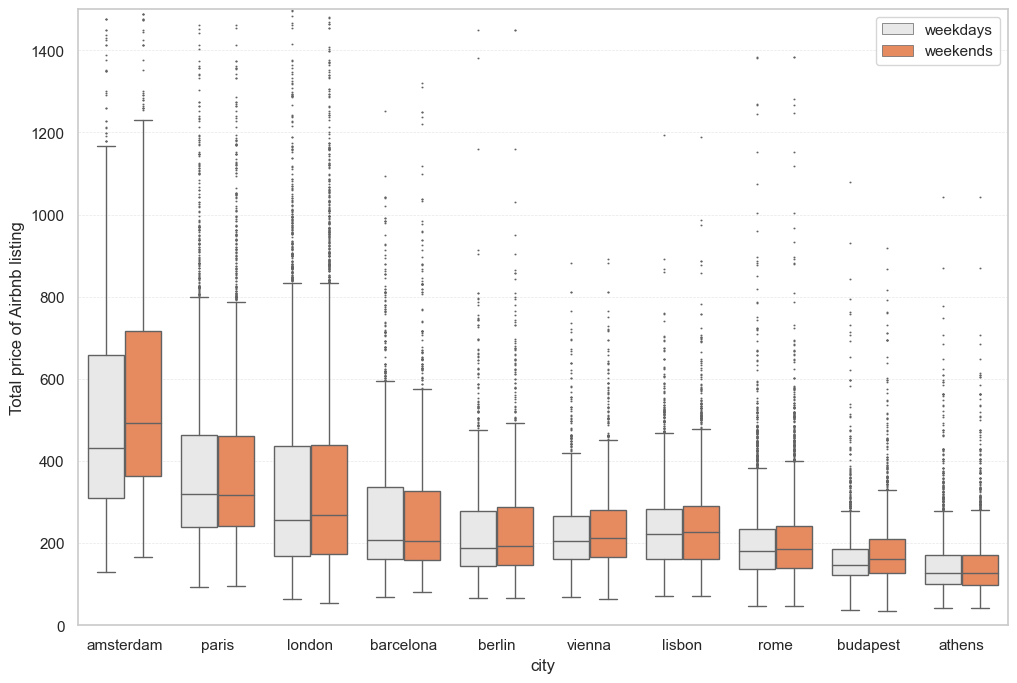

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure(figsize=(12, 8))
ax = plt.subplot()
plt.axis([0,8,0,1500])
sns.set_theme(style='ticks', palette='pastel')
sns.boxplot(x="city", y="realSum", hue="week_time", palette=['#E8E8E8', '#FC814A'], 
            data=europe_data, fliersize=0.5, linewidth=1, order=ranks)
plt.ylabel('Total price of Airbnb listing')
ax.set_xticklabels(ranks)
plt.grid(axis='y', color='#E8E8E8', linestyle='--', linewidth=.5)
plt.legend(loc=1)
plt.show()
plt.clf()

This boxplot gives us a clear overview of prices between cities. Amsterdam is clearly the most expensive city to book your stay, this may be due to it having the fewest listings as we saw in previous graphs. Furthermore, apart from Amsterdam and Budapest, a lot of cities are not significantly more expensive during the weekend.

### 3 Influence of Spatial factors to Price
In this next part we investigate whether there is a correlation between the price (realSum) and the distance to the city centre and also between the price (realSum) and the longitude and latitude of a particular listing.

In [19]:
europe_data_weekends = europe_data[europe_data.week_time == 'weekends']

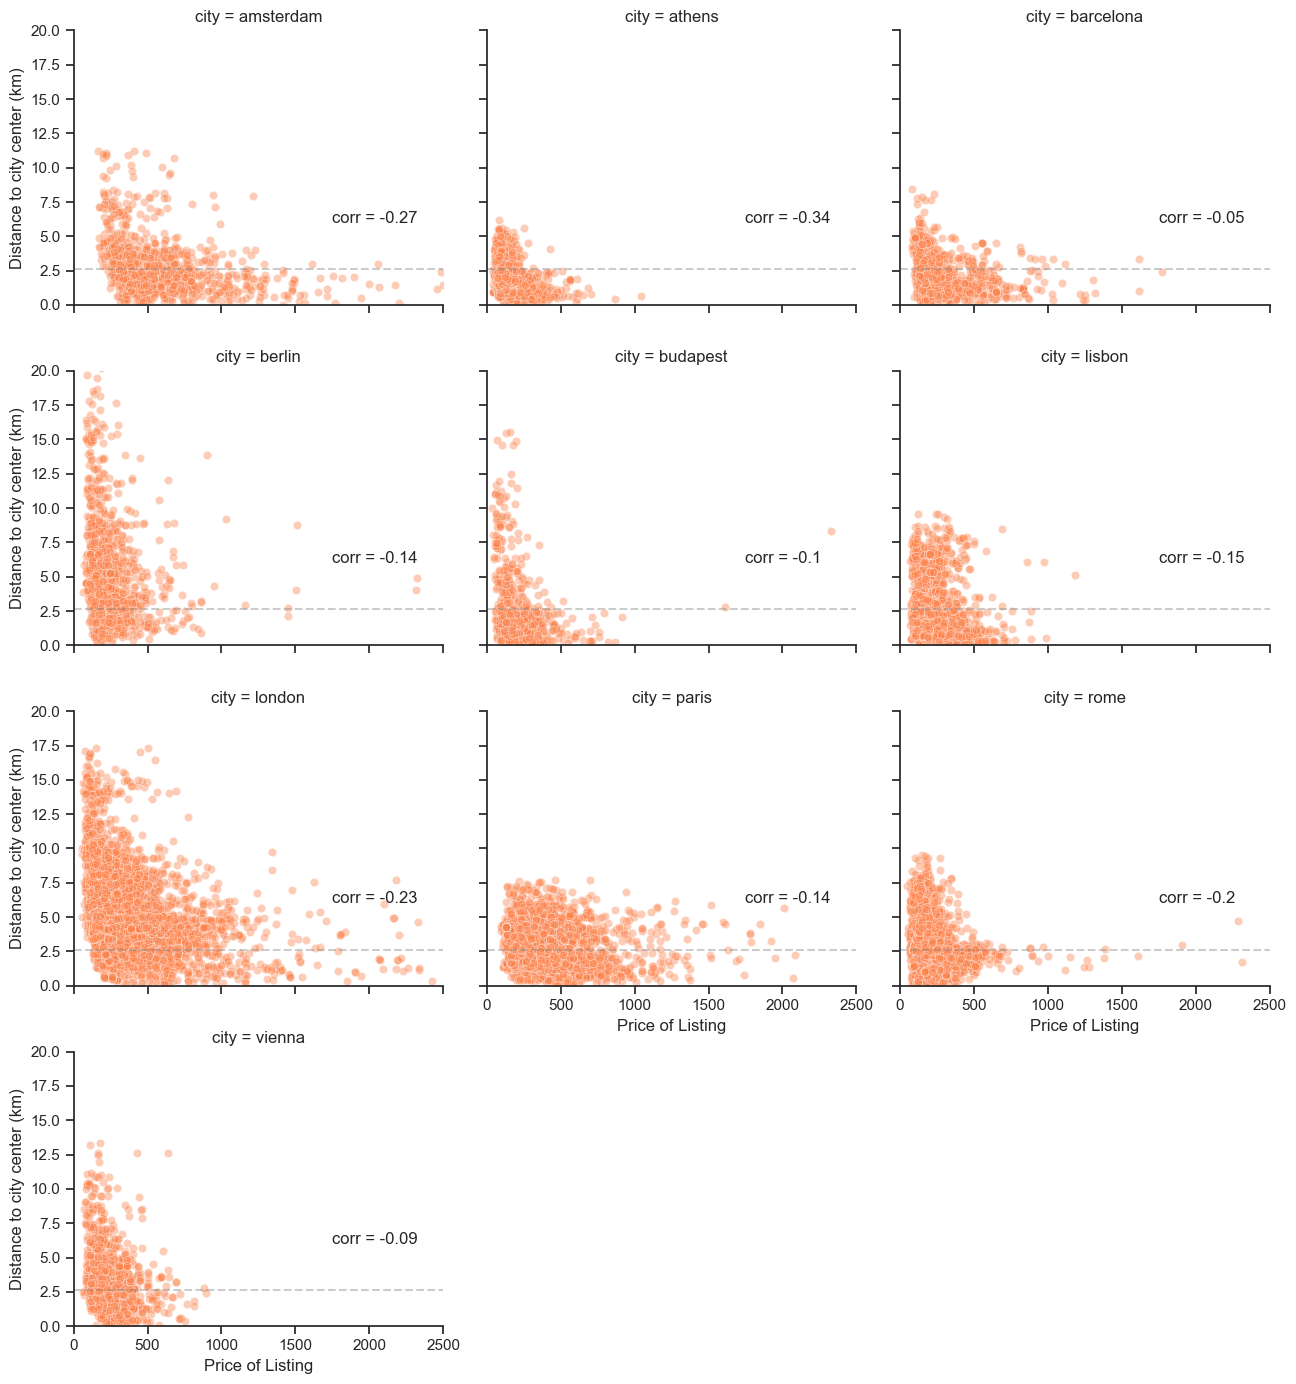

In [20]:
grid = sns.FacetGrid(europe_data_weekends, col='city', col_wrap=3, xlim=(0, 2500), ylim=(0, 20), height=3.5, aspect=1.25
                    , margin_titles=True)
grid.map(sns.scatterplot, "realSum", "dist", color='#FC814A', alpha=.4)
grid.refline(y=europe_data_weekends.dist.median(), alpha=.4)
grid.set_axis_labels("Price of Listing", "Distance to city center (km)")
grid.set_titles(template=europe_data_weekends.city)

def annotate(data, **kws):
    n = len(data)
    corr, p = pearsonr(data.realSum, data.dist)
    ax = plt.gca()
    ax.text(.7, .3, f"corr = {round(corr,2)}", transform=ax.transAxes)

grid.map_dataframe(annotate)


plt.show()

These scatterplots give us an overview of the relationship between the distance to the city center and the price of the listing for every city in the dataset. 

Added is a reference line of the mean distance to the city center of all the cities combined and a correlation value for the distance and the price for each city individually.

More patterns can be observed using these scatterplots, for example the distribution of listings per city. Comparing Berlin and Athens for example gives a clear indication that the Airbnb's in berlin have a far greater spread. 



### 3.1 Hexbin plot with distributions of Price vs Distance to center

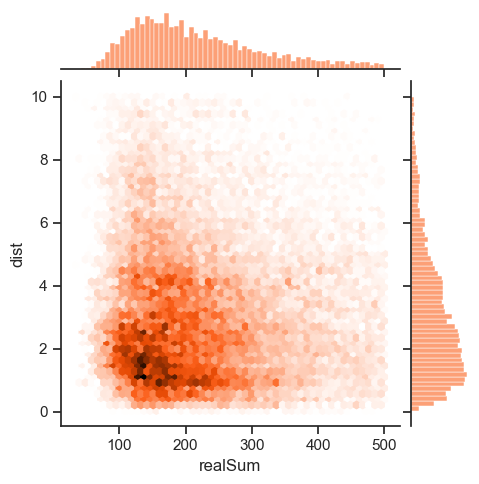

In [32]:
sns.jointplot(x=europe_data.realSum[(europe_data.realSum < 500) & (europe_data.dist < 10)],
              y=europe_data.dist[(europe_data.realSum < 500) & (europe_data.dist < 10)], 
              kind="hex", color='#FC814A', height=5, marginal_ticks=False, label='Distance to city center')


In [22]:
europe_data = pd.get_dummies(data=europe_data, columns=['room_type'])
europe_data = europe_data.rename(columns={
    'room_type_Entire home/apt': 'entire_home_apt',
    'room_type_Private room' : 'private_room',
    'room_type_Shared room' : 'shared_room'
})

### 4 Multiple Regression Model to find strongest determinants of price and to make predictions

In [23]:
europe_data.week_time = europe_data.week_time.apply(lambda string: 1 if string == 'weekdays' else 0)
europe_data = pd.get_dummies(data=europe_data, columns=['city'])


0.22551806874392433 0.22860787915849967


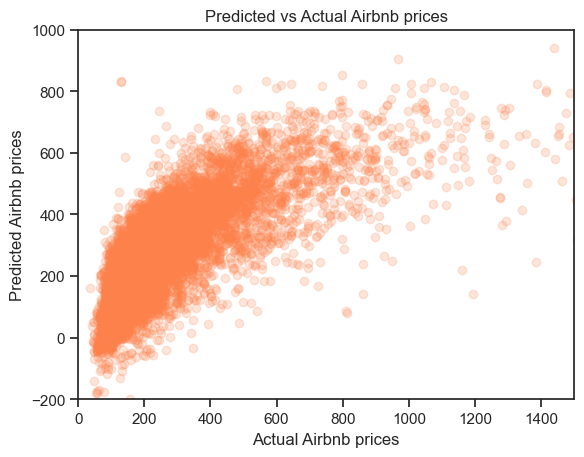

Test apartment = no room shared, private room, 2 person capacity, not a superhost, multiple rooms, not intended for business, cleanliness rating of 9.5, overal guest rating of 9.2, has one bedroom  is 500 meters from city center, 1km from metro, listing for weekdays, in Barcelona
-------------------------------------------------------------------------
Predicted realSum for appartment: €315.34


In [45]:
features = europe_data[['room_shared', 'room_private', 'person_capacity', 'host_is_superhost', 'multi', 'biz', 'cleanliness_rating',
                        'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'week_time', 'entire_home_apt',
                'city_amsterdam', 'city_athens', 'city_barcelona', 'city_berlin', 'city_budapest', 'city_lisbon',
                'city_london', 'city_paris', 'city_rome', 'city_vienna']]
X = features.values

y = europe_data.realSum

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

MLR = LinearRegression()

model = MLR.fit(X_train, y_train)
y_predict = MLR.predict(X_test)

train_score = MLR.score(X_train, y_train)
test_score = MLR.score(X_test, y_test)
print(train_score, test_score)

plt.scatter(y_test, y_predict, color='#FC814A', alpha=.2)
plt.axis([0,1500,-200,1000])
plt.ylabel('Predicted Airbnb prices')
plt.xlabel('Actual Airbnb prices')
plt.title('Predicted vs Actual Airbnb prices')
plt.show()
plt.close()

airbnb_apartment_ams = [[False, True, 2, False, 1, 0, 9.5, 9.2, 1, 1, 0.5, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]]
predicted_airbnb_apartment_ams = MLR.predict(airbnb_apartment_ams)
print('Test apartment = no room shared, private room, 2 person capacity, not a superhost, multiple rooms, not intended for business, cleanliness rating of 9.5, overal guest rating of 9.2, has one bedroom  is 500 meters from city center, 1km from metro, listing for weekdays, in Barcelona')
print('-------------------------------------------------------------------------')
print("Predicted realSum for appartment: €%.2f" % predicted_airbnb_apartment_ams)

   

In [25]:
coef_comparison = []

for feature, coef in zip(features, MLR.coef_):
    coef_comparison.append((round(coef), feature))
    
coef_comparison.sort()

x = []
y = []

for comparison in coef_comparison:
    x.append(comparison[1])
    y.append(comparison[0])

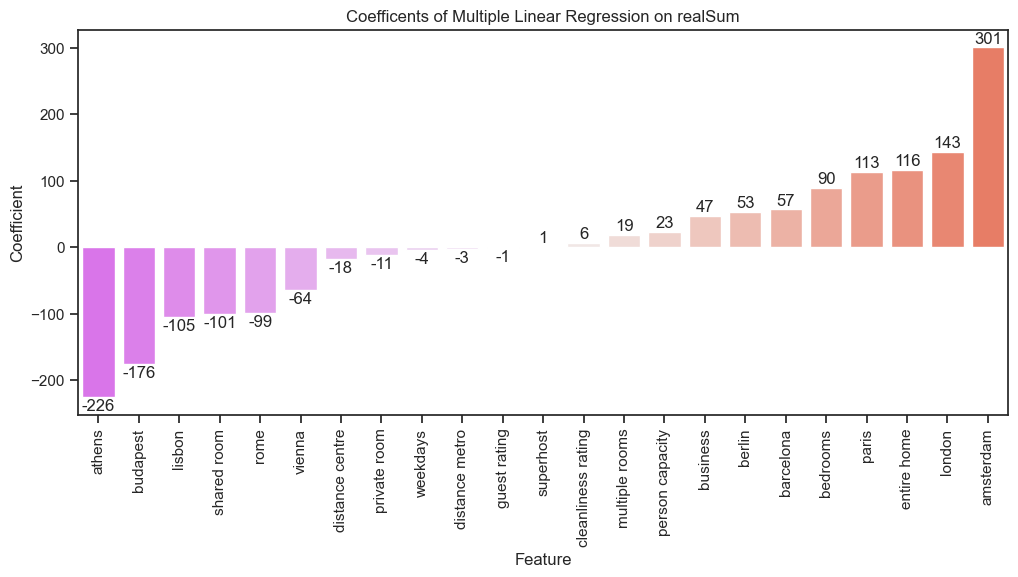

In [26]:
labels = ['athens', 'budapest', 'lisbon', 'shared room', 'rome', 'vienna', 'distance centre', 'private room', 'weekdays', 'distance metro',
          'guest rating', 'superhost', 'cleanliness rating', 'multiple rooms', 'person capacity', 'business',
        'berlin', 'barcelona', 'bedrooms', 'paris', 'entire home', 'london', 'amsterdam']

figure, ax = plt.subplots(figsize=(12,5))
sns.barplot(x=x, y=y, palette=diverging23)
ax.bar_label(ax.containers[0], label=y, label_type="edge", padding=1)
ax.set_xticklabels(labels, rotation=90)
plt.ylabel('Coefficient')
plt.xlabel('Feature')
plt.title('Coefficents of Multiple Linear Regression on realSum')

plt.show()

This graph displays all the coefficients and features, ranked by the magnitude of the coefficient.